#  IMPORTING OF LIBRARIES

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOADING THE DATA

In [ ]:
#Load files
train = pd.read_csv('OPTION1_uk_road_accident_2019_coursework_final.csv')

In [ ]:
#preveiw the dataset
train.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


# INFORMATION ABOUT THE DATASET

In [ ]:
#dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18298 entries, 0 to 18297
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accident_index               18298 non-null  object 
 1   speed_limit                  18298 non-null  int64  
 2   light_conditions             18298 non-null  object 
 3   weather_conditions           18298 non-null  object 
 4   road_surface_conditions      18298 non-null  object 
 5   vehicle_type                 18297 non-null  object 
 6   junction_location            18297 non-null  object 
 7   skidding_and_overturning     18297 non-null  object 
 8   vehicle_leaving_carriageway  18297 non-null  object 
 9   hit_object_off_carriageway   18297 non-null  object 
 10  first_point_of_impact        18297 non-null  object 
 11  sex_of_driver                18297 non-null  object 
 12  age_of_oldest_driver         14558 non-null  float64
 13  accident_severit

In [ ]:
#shape of the dataset
train.shape

(31647, 14)

In [ ]:
#column of the dataset
train.columns

Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')

In [ ]:
#column types
train.dtypes

NameError: ignored

#STATISTICAL SUMMARY

In [ ]:
#train statistical summary
train.describe()

,speed_limit,age_of_oldest_driver
count,31647.000000,25197.000000
mean,36.572029,47.254038
std,13.837362,16.779656
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,40.000000,59.000000
max,70.000000,101.000000


#MISSING VALUES

In [ ]:
#value of nan in each column
train.isna().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      1
junction_location                 1
skidding_and_overturning          1
vehicle_leaving_carriageway       1
hit_object_off_carriageway        1
first_point_of_impact             1
sex_of_driver                     1
age_of_oldest_driver           3740
accident_severity               689
dtype: int64

In [ ]:
train["age_of_oldest_driver"]

0        63.0
1        82.0
2         NaN
3         NaN
4        39.0
         ... 
31642    27.0
31643    27.0
31644    67.0
31645    24.0
31646    54.0
Name: age_of_oldest_driver, Length: 31647, dtype: float64

In [ ]:
train["accident_severity"]

0        serious
1          fatal
2        serious
3        serious
4         slight
          ...   
31642    serious
31643    serious
31644     slight
31645      fatal
31646      fatal
Name: accident_severity, Length: 31647, dtype: object

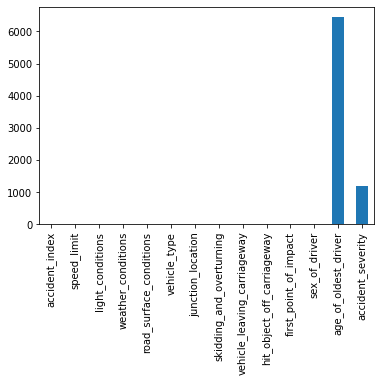

In [ ]:
#plot of nan values
train.isna().sum().plot(kind="bar")
plt.show()

#FILLING THE MISSING VALUES

In [ ]:
# most common value of accident_severity
train["accident_severity"].mode()

0    slight
Name: accident_severity, dtype: object

In [ ]:
# filling nan with the common value
train["accident_severity"].fillna(train["accident_severity"].mode()[0],inplace=True)
train["accident_severity"].isna().values.any()

False

In [ ]:
# mean of age_of_oldest_driver
train["age_of_oldest_driver"].mean()

47.25403817914831

In [ ]:
#median of age_of_oldest_driver
train["age_of_oldest_driver"].median()

47.0

In [ ]:
# filling nan with the median
train["age_of_oldest_driver"].fillna(train["age_of_oldest_driver"].median(),inplace=True)
train["age_of_oldest_driver"].isna().values.any()

False

In [ ]:
#sum of the nan in the dataset
train.isna().sum()

accident_index                 0
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

#EXPLORATORY DATA ANALYSIS

In [ ]:
# duplicated value
train.duplicated().sum()

1172

In [ ]:
#drop dupllicate
train.drop_duplicates(inplace=True)

In [ ]:
train.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,47.0,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,47.0,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


In [ ]:
#unique values
train['light_conditions'].unique()

array(['darkness', 'daylight'], dtype=object)

In [ ]:
train['weather_conditions'].unique()

array(['other', 'fine', 'data missing or out of range', 'fog or mist'],
      dtype=object)

In [ ]:
train['road_surface_conditions'].unique()

array(['wet or damp', 'dry', 'data missing or out of range', 'other',
       'flood over 3cm. deep'], dtype=object)

In [ ]:
train['vehicle_type'].unique()

array(['at least one van', 'only cars', 'at least one biped', 'other',
       'biped and van', 'data missing or out of range'], dtype=object)

In [ ]:
# drop index
train = train.drop(["accident_index", ], axis=1)

In [ ]:
# list of object
categorical_columns = train.select_dtypes('object').columns.to_list()
categorical_columns

['light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'vehicle_type',
 'junction_location',
 'skidding_and_overturning',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'sex_of_driver',
 'accident_severity']

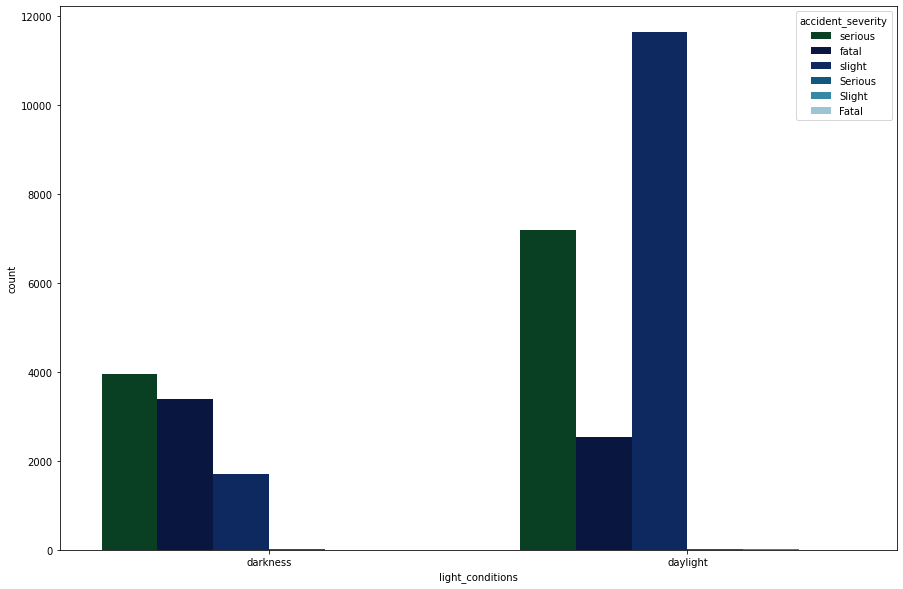

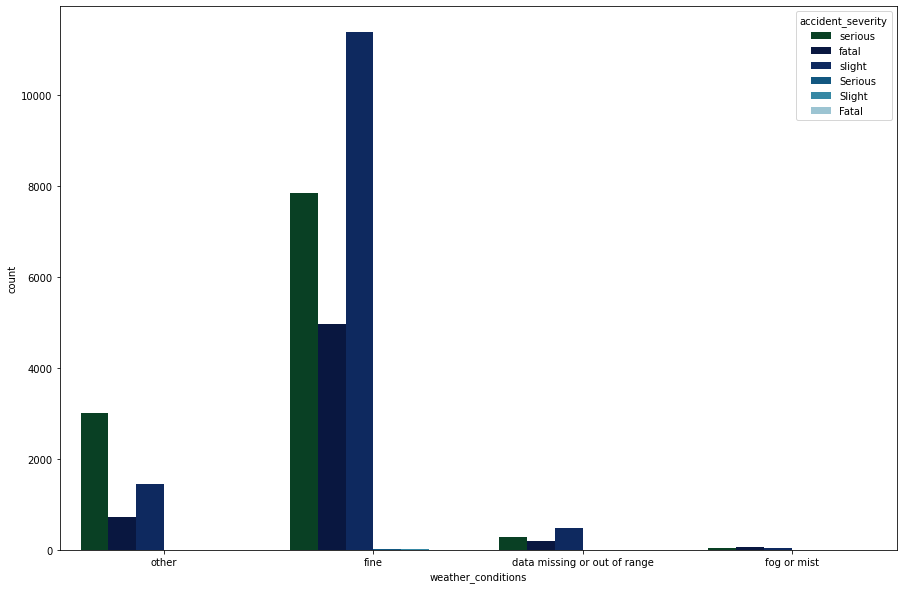

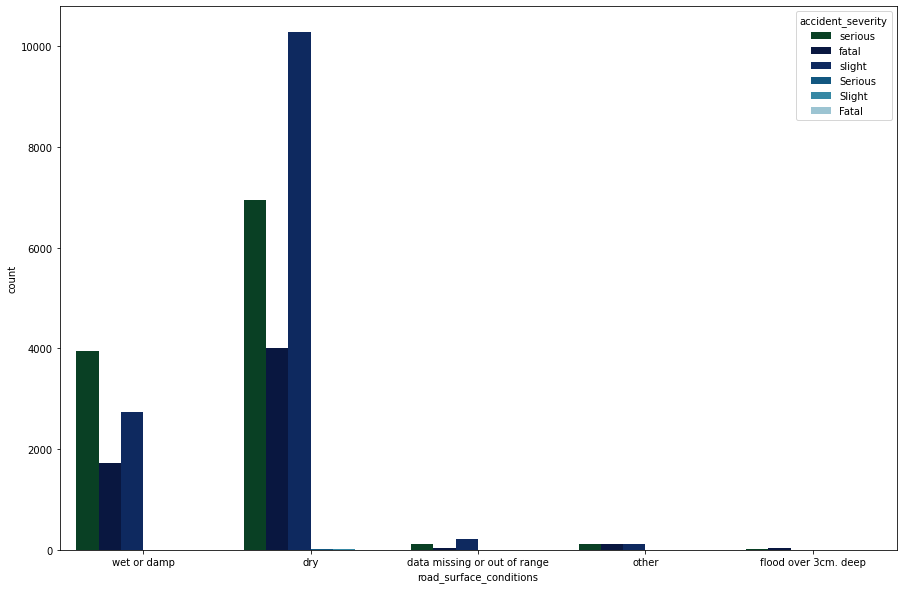

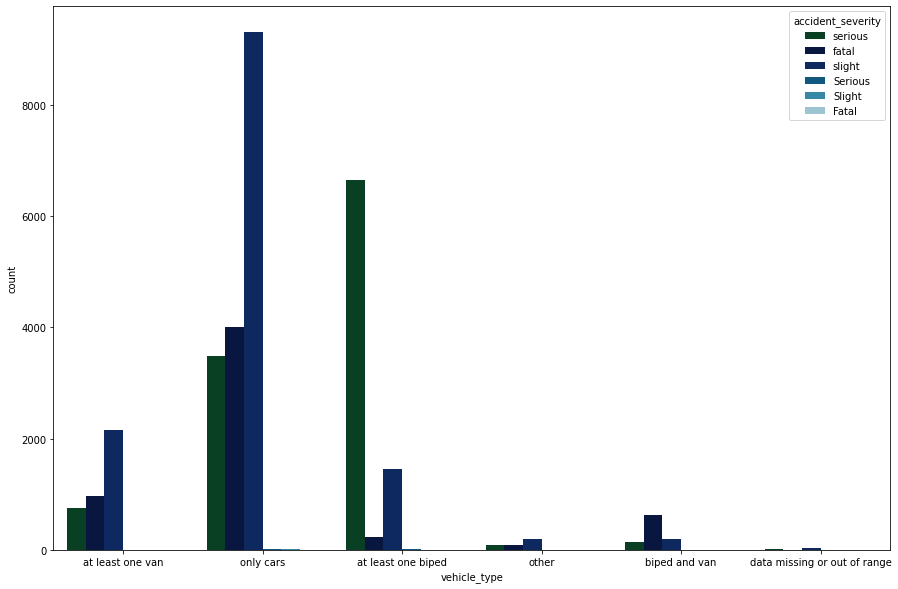

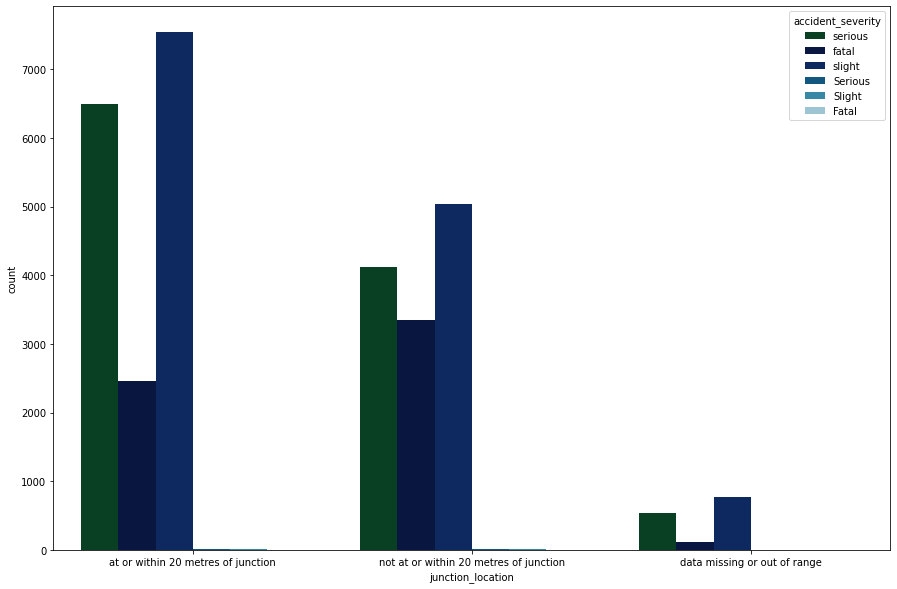

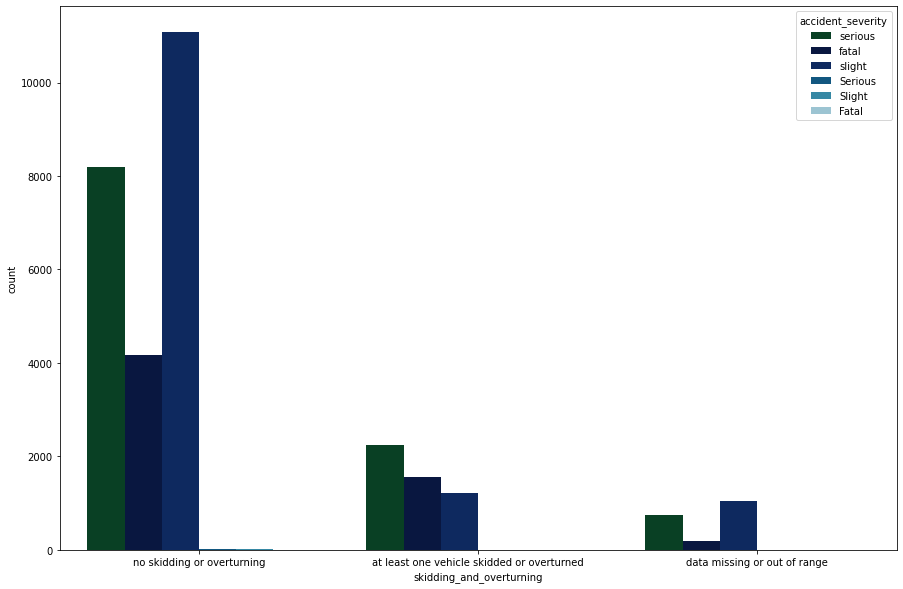

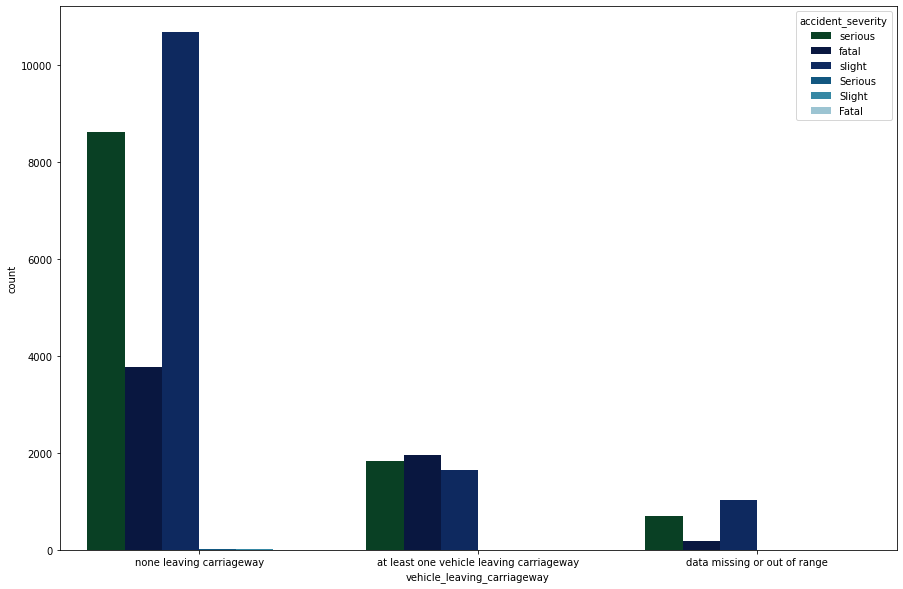

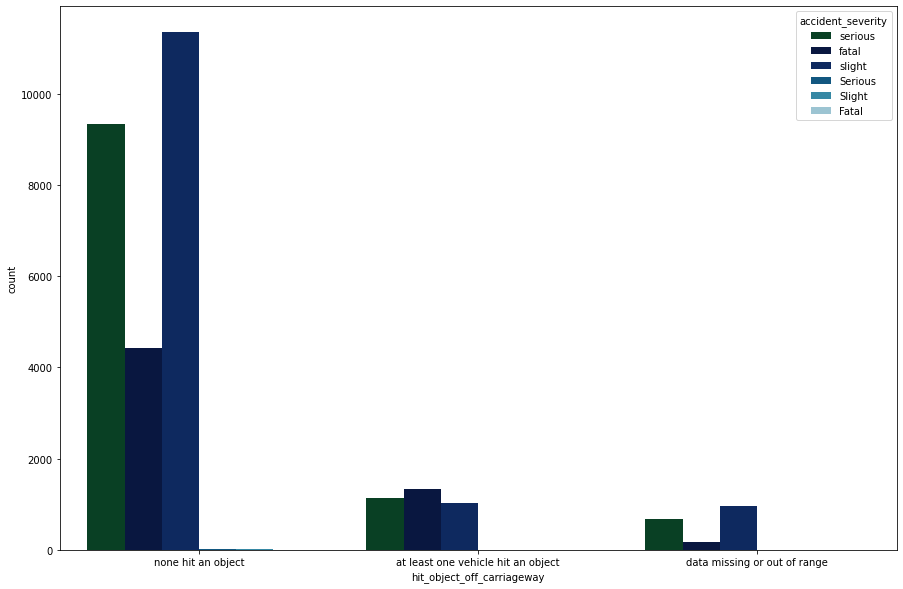

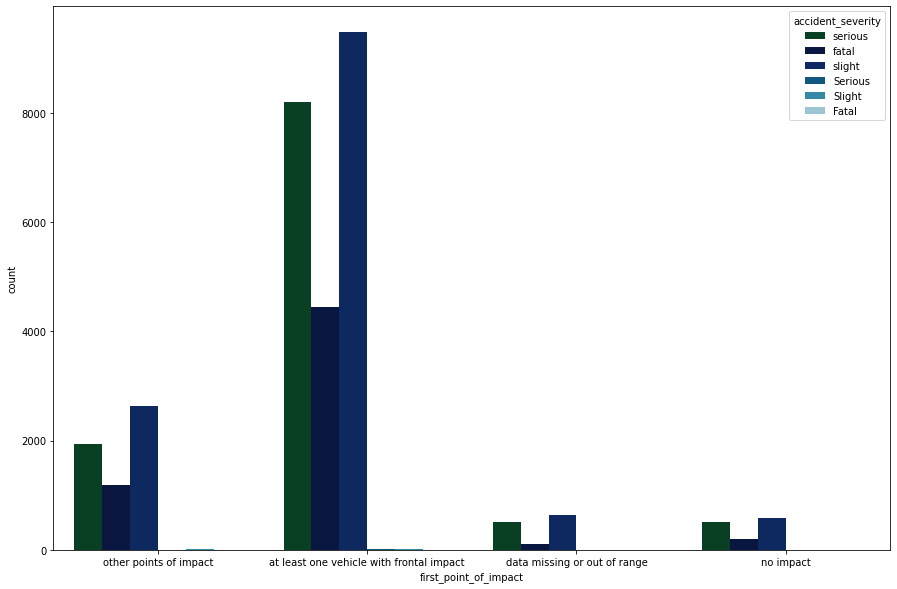

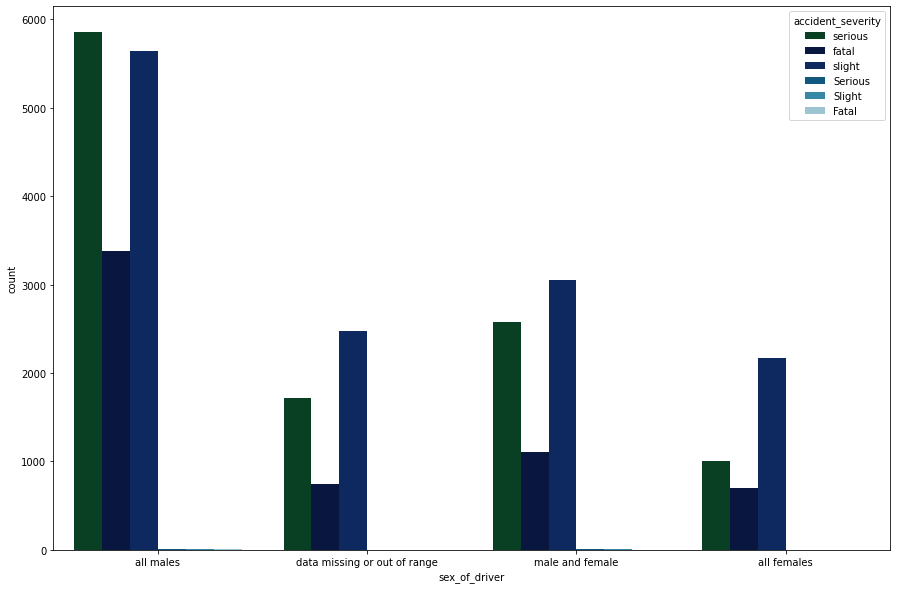

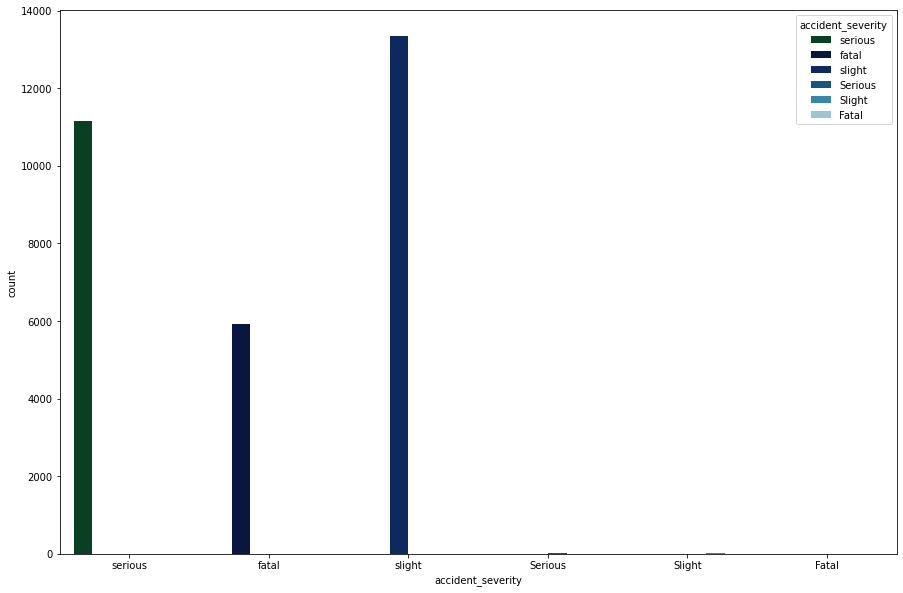

In [ ]:
# Plot of object columns in relation with the target column
for i in categorical_columns:
    plt.figure(figsize=(15,10))
    sns.countplot(x=i,hue='accident_severity',data=train,palette='ocean')
    plt.xlabel(i,fontsize=10)

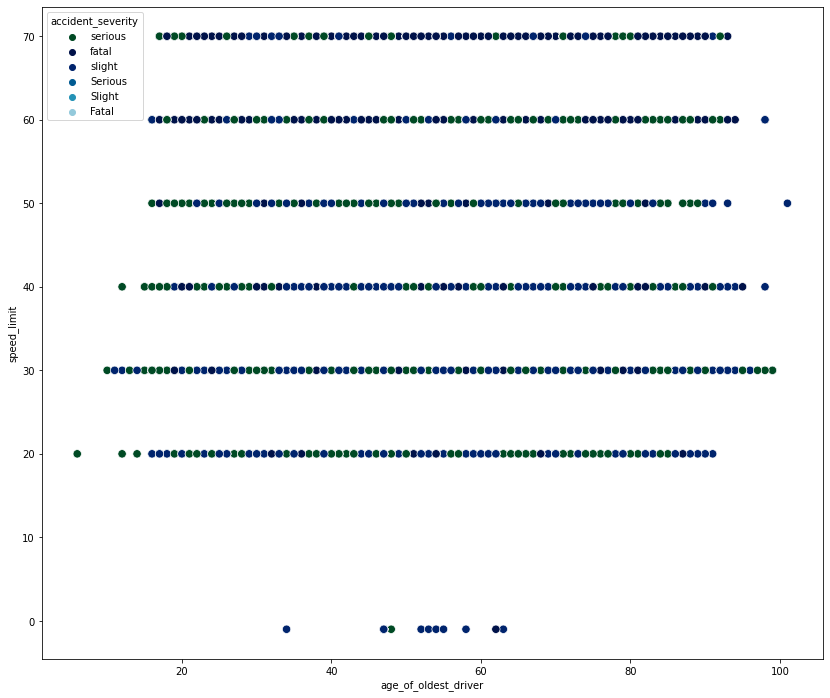

In [ ]:
#relationship between the numerical column
plt.figure(figsize=(14,12))

sns.scatterplot(data=train,x="age_of_oldest_driver",y="speed_limit",s=70,hue="accident_severity",palette='ocean')

plt.show()

<Axes: >

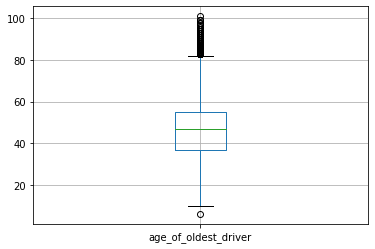

In [ ]:
#boxplot of the numerical columns
train[["age_of_oldest_driver"]].boxplot()


<Axes: >

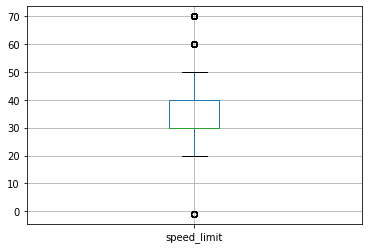

In [ ]:
train[["speed_limit"]].boxplot()

In [ ]:
#correlation
train.corr()

,speed_limit,age_of_oldest_driver
speed_limit,1.000000,0.035716
age_of_oldest_driver,0.035716,1.000000


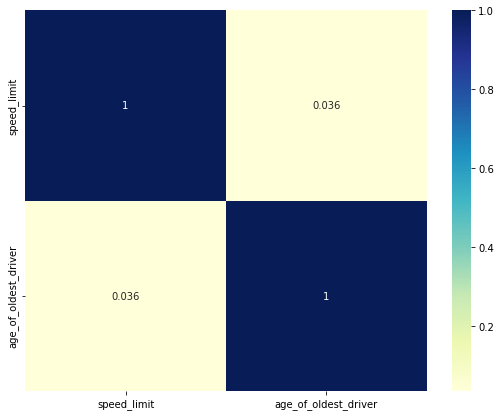

In [ ]:
#correlation plot
fig,ax = plt.subplots(figsize=(9,7))
correlations = train.corr()
sns.heatmap(correlations,cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
# turn capital letter strings to small
train["accident_severity"] = train["accident_severity"].str.lower()

In [ ]:
# the values in the column
train['accident_severity'].unique()

array(['serious', 'fatal', 'slight'], dtype=object)

CATEGORIZING / ENCODING FEATURES

In [ ]:
# categorizing string values in the columns
cat_features = ['light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'vehicle_type',
 'junction_location',
 'skidding_and_overturning',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'sex_of_driver','accident_severity']
for cat_feature in cat_features:
    train[f"{cat_feature}_cat"] = train[cat_feature].astype('category')
    train[f"{cat_feature}_cat"] = train[f"{cat_feature}_cat"].cat.codes
    
train.head()

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,...,weather_conditions_cat,road_surface_conditions_cat,vehicle_type_cat,junction_location_cat,skidding_and_overturning_cat,vehicle_leaving_carriageway_cat,hit_object_off_carriageway_cat,first_point_of_impact_cat,sex_of_driver_cat,accident_severity_cat
0,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,...,3,4,1,0,2,2,2,3,1,1
1,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,...,1,1,4,0,2,0,0,0,1,0
2,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,...,1,1,4,0,2,2,2,0,2,1
3,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,...,1,1,4,2,2,2,2,0,3,1
4,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,...,1,1,4,2,2,2,2,0,0,2


In [ ]:
#dropping string columns after replacing with another column
train.drop(['light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'vehicle_type',
 'junction_location',
 'skidding_and_overturning',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'sex_of_driver','accident_severity'],axis=1,inplace=True)

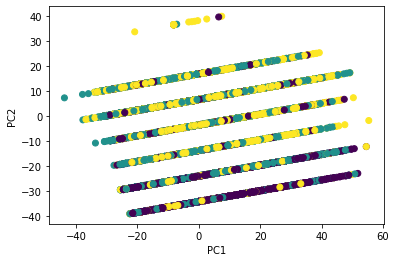

In [ ]:
# Split the dataset into features and target labels
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the reduced dataset with the target labels
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

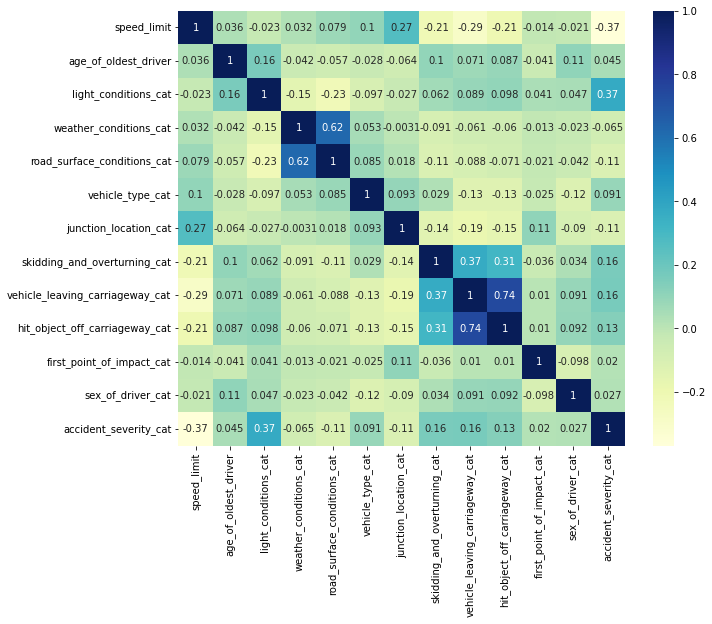

In [ ]:
# correlation of the preprocessed data
fig,ax = plt.subplots(figsize=(10,8))
correlations_ML = train.corr()

sns.heatmap(correlations_ML,cmap="YlGnBu",annot=True)
plt.show()

#MACHINE LEARNING MODELS

In [ ]:
#Selection of the variables
x = train.drop('accident_severity_cat',axis=1)
y = train['accident_severity_cat']

#Splitting the data
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

BASELINE MODELLING FOR ML

In [ ]:
# Generate some toy data with 3 classes and 1000 samples
X = np.random.rand(1000, 10)
y = np.random.randint(0, 3, size=1000)

# Define the majority class baseline
baseline = DummyClassifier(strategy='most_frequent')

# Fit the baseline model to the training data
baseline.fit(X, y)

# Make predictions on new data
y_pred = baseline.predict(X)

# Evaluate the accuracy of the baseline model
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
print('Accuracy of majority class baseline:', accuracy)
print('F1_score:', f1)

Accuracy of majority class baseline: 0.368
F1_score: 0.19798830409356727


MODEL 1: RANDOM FOREST CLASSIFIER

In [ ]:
#modelling
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_x,train_y)

#Making prediction
predict_1 = rf_model.predict(test_x)

#Measuring accuracy
print(classification_report(test_y,predict_1))
print("Accuracy:",accuracy_score(predict_1,test_y))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61      1187
           1       0.69      0.69      0.69      2236
           2       0.77      0.73      0.75      2672

    accuracy                           0.70      6095
   macro avg       0.68      0.69      0.68      6095
weighted avg       0.70      0.70      0.70      6095

Accuracy: 0.6977850697292863


In [ ]:
# compute confusion matrix
con = confusion_matrix(test_y,predict_1)
print("Confusion matrix:\n", con)

# compute F1 score
f1 = f1_score(test_y,predict_1,average='weighted')
print("F1 score:", f1)

Confusion matrix:
 [[ 774  231  182]
 [ 298 1540  398]
 [ 274  459 1939]]
F1 score: 0.6995298028874365


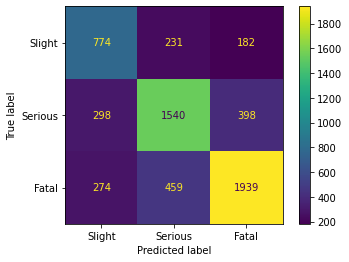

In [ ]:
# Define the class names
class_nam = ['Slight', 'Serious', 'Fatal']

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con, display_labels = class_nam)

cm_display.plot()
plt.show()

RANDOM FOREST WITH HYPERPARAMETER TUNING

In [ ]:
# Define the hyperparameters to be tuned
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [10, 20, 30]}

# Create the Random Forest Classifier model
rfc = RandomForestClassifier(random_state=42)

# Perform grid search cross validation with 5-fold CV
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best hyperparameters found
print(grid_search.best_params_)

KeyboardInterrupt: ignored

In [ ]:
#modelling
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(train_x,train_y)

#Making prediction
predict_1 = rf_model.predict(test_x)

#Measuring accuracy
print(classification_report(test_y,predict_1))
print("Accuracy:",accuracy_score(predict_1,test_y))
f1 = f1_score(test_y,predict_1,average='weighted')
print("F1 score:", f1)

MODEL 2: DECISION TREE CLASSIFIER

In [ ]:
#modelling
df_model = DecisionTreeClassifier(random_state=42)
df_model.fit(train_x,train_y)

#Making prediction
predict_2 = df_model.predict(test_x)

#Measuring accuracy
print(classification_report(test_y,predict_2))
print("Accuracy:",accuracy_score(predict_2,test_y))

In [ ]:
# compute confusion matrix
con1 = confusion_matrix(test_y,predict_2)
print("Confusion matrix:\n", con1)

# compute F1 score
f1 = f1_score(test_y,predict_2,average='weighted')
print("F1 score:", f1)

In [ ]:
# Define the class names
class_nam = ['Slight', 'Serious', 'Fatal']

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con1, display_labels = class_nam)

cm_display.plot()
plt.show()

MODEL3: LOGISTIC REGRESSION

In [ ]:
#modelling
lr_model = LogisticRegression(solver='lbfgs',max_iter=100,multi_class='auto', random_state=42)
lr_model.fit(train_x,train_y)

#Making prediction
predict_3 = lr_model.predict(test_x)

#Measuring accuracy
print(classification_report(test_y,predict_3))
print("Accuracy:",accuracy_score(predict_3,test_y))

In [ ]:
# compute confusion matrix
con2 = confusion_matrix(test_y,predict_3)
print("Confusion matrix:\n", con2)

# compute F1 score
f1 = f1_score(test_y,predict_3,average='weighted')
print("F1 score:", f1)

In [ ]:
# Define the class names
class_nam = ['Slight', 'Serious', 'Fatal']

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con2, display_labels = class_nam)

cm_display.plot()
plt.show()

MODEL 4: SVC

In [ ]:
#modelling
sv_model = SVC(random_state=42)
sv_model.fit(train_x,train_y)

#Making prediction
predict_4 = sv_model.predict(test_x)

#Measuring accuracy
print(classification_report(test_y,predict_4))
print("Accuracy:",accuracy_score(predict_4,test_y))

In [ ]:
# compute confusion matrix
con3 = confusion_matrix(test_y,predict_4)
print("Confusion matrix:\n", con3)

# compute F1 score
f1 = f1_score(test_y,predict_4,average='weighted')
print("F1 score:", f1)

In [ ]:
# Define the class names
class_nam = ['Slight', 'Serious', 'Fatal']

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con3, display_labels = class_nam)

cm_display.plot()
plt.show()

# NEURAL NETWORK MODELS

Baseline Modelling for Neural Network

In [ ]:
# Load the iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the majority class baseline classifier
dummy = DummyClassifier(strategy='most_frequent')

# Fit the classifier to the training data
dummy.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = dummy.predict(X_test)

# Evaluate the performance of the classifier using accuracy and F1-score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Majority class baseline:')
print('Accuracy: {:.3f}'.format(acc))
print('F1-score: {:.3f}'.format(f1))

1. Recurrent Neural Networks

In [ ]:
#Selection of the variables
x = train.drop('accident_severity_cat',axis=1)
y = train['accident_severity_cat']

#train and test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=103)

# Reshape the input data to fit the RNN input shape (batch_size, timesteps, features)
batch_size = 32
timesteps = 1
features = X_train.shape[1]
#X_train = X_train.reshape(-1, timesteps, features)
#X_test = X_test.reshape(-1, timesteps, features)

# Create the RNN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x.shape[1]))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=3, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Train the model
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test,verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


In [ ]:
# prediction
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

#compute classification report
print(classification_report(y_test,y_pred_labels))
print("Accuracy:",accuracy_score(y_test,y_pred_labels))


# compute confusion matrix
confusion = confusion_matrix(y_test,y_pred_labels)
print("Confusion matrix:\n", confusion )

# compute F1 score
f1 = f1_score(y_test,y_pred_labels,average='weighted')
print("F1 score:", f1)



In [ ]:
# Define the class names
class_nam = ['Slight', 'Serious', 'Fatal']

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = class_nam)

cm_display.plot()
plt.show()

2. Multilayer Perceptron (MLP)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train.drop('accident_severity_cat', axis=1), train['accident_severity_cat'], test_size=0.2, random_state=42)

# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Use the trained MLPClassifier to predict the labels of the testing data
y_pred1 = mlp.predict(X_test)

# Evaluate the accuracy of the MLPClassifier on the testing data
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)

Accuracy: 0.7399507793273175


In [ ]:
#compute classification report
print(classification_report(y_test,y_pred1))
print("Accuracy:",accuracy_score(y_test,y_pred1))


# compute confusion matrix
confusion1 = confusion_matrix(y_test,y_pred1)
print("Confusion matrix:\n", confusion1 )

# compute F1 score
f2 = f1_score(y_test,y_pred1,average='weighted')
print("F1 score:", f2)

              precision    recall  f1-score   support

           0       0.59      0.78      0.68      1169
           1       0.74      0.72      0.73      2228
           2       0.83      0.74      0.78      2698

    accuracy                           0.74      6095
   macro avg       0.72      0.75      0.73      6095
weighted avg       0.75      0.74      0.74      6095

Accuracy: 0.7399507793273175
Confusion matrix:
 [[ 917  162   90]
 [ 321 1602  305]
 [ 306  401 1991]]
F1 score: 0.7429711449525096


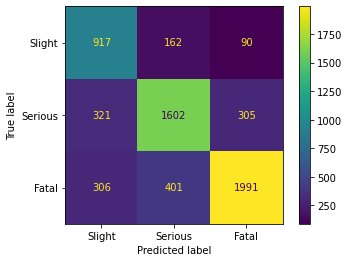

In [ ]:
# Define the class names
class_nam = ['Slight', 'Serious', 'Fatal']

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion1, display_labels = class_nam)

cm_display.plot()
plt.show()

3. BEST HYPERPARAMETER TUNING

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'hidden_layer_sizes': [(50,),(100,),(200,)], 
              'activation': ['relu', 'tanh', 'logistic'], 
              'alpha': [0.0001, 0.001, 0.01]}

# Create the MLP classifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create the grid search object
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, verbose=2)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data using the best hyperparameters
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,); total time=   9.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,); total time=  15.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,); total time=  10.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,); total time=   7.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,); total time=   8.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,); total time=   7.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,); total time=   7.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,); total time=   7.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,); total time=  10.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,); total time=  12.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200,); total time=  17.

In [ ]:
# Calculate the accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f3 = f1_score(y_test,y_pred,average='weighted')
print("F1 score:", f3)
print("Accuracy:", accuracy)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

F1 score: 0.7547407620644081
Accuracy: 0.7511074651353569
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.83      0.69      1169
           1       0.75      0.73      0.74      2228
           2       0.86      0.73      0.79      2698

    accuracy                           0.75      6095
   macro avg       0.74      0.77      0.74      6095
weighted avg       0.77      0.75      0.75      6095

Confusion matrix:
 [[ 971  140   58]
 [ 336 1634  258]
 [ 334  391 1973]]


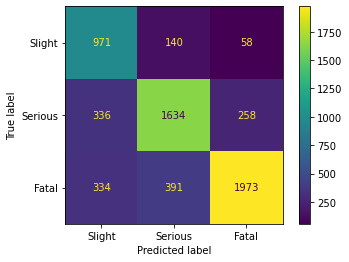

In [ ]:
# Define the class names
class_nam = ['Slight', 'Serious', 'Fatal']
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_nam)

cm_display.plot()
plt.show()